<a href="https://colab.research.google.com/github/Tulasipotu08/hackathon/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [17]:
df=pd.read_csv('/content/77_cancer_proteomes_CPTAC_itraq.csv')

In [18]:
df.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [19]:
df.tail()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
12548,NP_001191293,NaN,protein FAM24B precursor,NaN,NaN,NaN,-16.029761,1.729692,4.107251,-9.584499,...,-6.66235,NaN,NaN,NaN,NaN,NaN,NaN,-8.020071,-3.093822,-4.602418
12549,NP_775791,NaN,putative uncharacterized protein C9orf62,NaN,NaN,NaN,-2.046065,-0.425182,-3.203370,-4.786183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049608,-0.646977,0.240590
12550,NP_004065,COX8A,"cytochrome c oxidase subunit 8A, mitochondrial",NaN,NaN,NaN,-1.778435,-0.149673,1.971481,-3.103949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12551,NP_068752,MIIP,migration and invasion-inhibitory protein,-0.633517,4.840325,-1.965192,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019861,-1.718327,-0.369183
12552,NP_219494,KIAA1737,uncharacterized protein KIAA1737,12.666488,0.140736,-2.854835,-3.069752,-0.047997,NaN,NaN,...,-6.00286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RefSeq_accession_number  12553 non-null  object 
 1   gene_symbol              10773 non-null  object 
 2   gene_name                12553 non-null  object 
 3   AO-A12D.01TCGA           11334 non-null  float64
 4   C8-A131.01TCGA           11335 non-null  float64
 5   AO-A12B.01TCGA           11334 non-null  float64
 6   BH-A18Q.02TCGA           12024 non-null  float64
 7   C8-A130.02TCGA           12025 non-null  float64
 8   C8-A138.03TCGA           11833 non-null  float64
 9   E2-A154.03TCGA           11833 non-null  float64
 10  C8-A12L.04TCGA           11732 non-null  float64
 11  A2-A0EX.04TCGA           11732 non-null  float64
 12  AO-A12D.05TCGA           11276 non-null  float64
 13  AN-A04A.05TCGA           11276 non-null  float64
 14  BH-A0AV.05TCGA        

In [21]:
df.columns

Index(['RefSeq_accession_number', 'gene_symbol', 'gene_name', 'AO-A12D.01TCGA',
       'C8-A131.01TCGA', 'AO-A12B.01TCGA', 'BH-A18Q.02TCGA', 'C8-A130.02TCGA',
       'C8-A138.03TCGA', 'E2-A154.03TCGA', 'C8-A12L.04TCGA', 'A2-A0EX.04TCGA',
       'AO-A12D.05TCGA', 'AN-A04A.05TCGA', 'BH-A0AV.05TCGA', 'C8-A12T.06TCGA',
       'A8-A06Z.07TCGA', 'A2-A0CM.07TCGA', 'BH-A18U.08TCGA', 'A2-A0EQ.08TCGA',
       'AR-A0U4.09TCGA', 'AO-A0J9.10TCGA', 'AR-A1AP.11TCGA', 'AN-A0FK.11TCGA',
       'AO-A0J6.11TCGA', 'A7-A13F.12TCGA', 'BH-A0E1.12TCGA', 'A7-A0CE.13TCGA',
       'A2-A0YC.13TCGA', 'AO-A0JC.14TCGA', 'A8-A08Z.14TCGA', 'AR-A0TX.14TCGA',
       'A8-A076.15TCGA', 'AO-A126.15TCGA', 'BH-A0C1.16TCGA', 'A2-A0EY.16TCGA',
       'AR-A1AW.17TCGA', 'AR-A1AV.17TCGA', 'C8-A135.17TCGA', 'A2-A0EV.18TCGA',
       'AN-A0AM.18TCGA', 'D8-A142.18TCGA', 'AN-A0FL.19TCGA', 'BH-A0DG.19TCGA',
       'AR-A0TV.20TCGA', 'C8-A12Z.20TCGA', 'AO-A0JJ.20TCGA', 'AO-A0JE.21TCGA',
       'AN-A0AJ.21TCGA', 'A7-A0CJ.22TCGA', 'AO-A12F

In [22]:
print(df.shape)

(12553, 86)


In [23]:
df.size

1079558

In [24]:
df.describe()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
count,11334.000000,11335.000000,11334.000000,12024.000000,12025.000000,11833.000000,11833.000000,11732.000000,11732.000000,11276.000000,...,11477.000000,10324.000000,10324.000000,10324.000000,9694.000000,9693.000000,9697.000000,10912.000000,10885.000000,10913.000000
mean,0.133079,0.128822,-0.440764,-0.729233,-0.039436,0.115353,-0.618354,-0.305320,-0.021228,0.077247,...,-0.677085,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,0.069555,-0.298170,0.310974
std,1.734231,1.579845,1.634930,2.422452,1.353505,1.652918,2.281818,1.567687,1.651917,1.749695,...,2.018394,1.570606,1.656519,1.628017,1.658080,1.453737,1.716237,1.950822,1.307027,1.706759
min,-12.466750,-13.156553,-9.911008,-24.553794,-15.004199,-12.956961,-16.640848,-18.710032,-14.711526,-13.441463,...,-12.497832,-12.152747,-11.874381,-11.128835,-8.772601,-10.427946,-12.967849,-12.609296,-9.058864,-6.328154
25%,-0.656376,-0.583835,-1.330525,-1.266591,-0.671172,-0.679944,-1.278707,-0.991299,-0.718023,-0.728075,...,-1.731881,-0.815820,-0.740905,-0.805968,-0.497485,-1.063180,-0.934818,-0.867155,-1.056363,-0.652571
50%,0.078915,0.116448,-0.318937,-0.296430,0.024160,0.088055,-0.157218,-0.231885,0.037039,0.045209,...,-0.444306,-0.056808,0.023619,-0.037659,0.314206,-0.204129,-0.079784,0.052313,-0.191285,0.137007
75%,0.905641,0.853163,0.489641,0.449590,0.719492,0.929197,0.670727,0.483663,0.750830,0.862472,...,0.500677,0.657177,0.800701,0.714075,1.276655,0.521043,0.757374,1.009641,0.574868,1.059485
max,17.623036,12.677023,8.289261,11.790434,6.925004,10.602330,10.079191,8.804312,9.548006,13.066445,...,8.839935,10.694780,11.309371,12.638208,11.164262,7.886564,11.521261,16.183559,6.435721,10.497291


In [25]:
print('missing values')
df.isnull().sum()

missing values


RefSeq_accession_number       0
gene_symbol                1780
gene_name                     0
AO-A12D.01TCGA             1219
C8-A131.01TCGA             1218
                           ... 
BH-A0C7.36TCGA             2860
A2-A0SX.36TCGA             2856
263d3f-I.CPTAC             1641
blcdb9-I.CPTAC             1668
c4155b-C.CPTAC             1640
Length: 86, dtype: int64

In [45]:
selected_features=['gene_symbol	','gene_name']

In [55]:
X=df['gene_symbol']
y=df['gene_name']
X_train,X_test,y_train,y_test=train_test_split(X.values.reshape(-1,1),y,test_size=0.2,random_state=30)

In [52]:
le=LabelEncoder()
df["gene_name"]=le.fit_transform(df["gene_name"])

In [53]:
le=LabelEncoder()
df["gene_symbol"]=le.fit_transform(df["gene_symbol"])

In [56]:
model=KMeans()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [58]:
y_pred=model.predict(X_test)

In [60]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 52306643.97570689


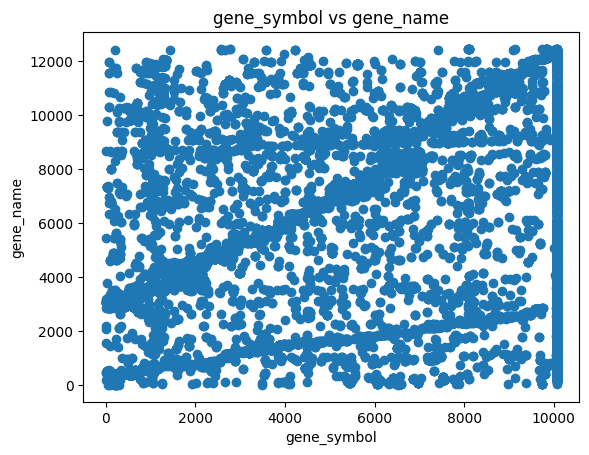

In [61]:
plt.scatter(df['gene_symbol'],df['gene_name'])
plt.xlabel("gene_symbol")
plt.ylabel("gene_name")
plt.title('gene_symbol vs gene_name')
plt.show()